# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

<IPython.core.display.Javascript object>

In [2]:
visa = pd.read_csv("EasyVisa.csv")  #  reads the data

<IPython.core.display.Javascript object>

In [3]:
# copying data to another variable to avoid any changes to original data
data = visa.copy()

<IPython.core.display.Javascript object>

In [4]:
data.head()  # view top 5 rows of the data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


<IPython.core.display.Javascript object>

In [5]:
data.tail()  # view top 5 rows of the data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


<IPython.core.display.Javascript object>

In [6]:
data.shape  # view dimensions of the data

(25480, 12)

<IPython.core.display.Javascript object>

### Data types of the columns for the dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


<IPython.core.display.Javascript object>

In [8]:
data.nunique()

case_id                  25480
continent                    6
education_of_employee        4
has_job_experience           2
requires_job_training        2
no_of_employees           7105
yr_of_estab                199
region_of_employment         5
prevailing_wage          25454
unit_of_wage                 4
full_time_position           2
case_status                  2
dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
- prevailing_wage has a high number of values.
- case_id has no duplicates, due to each case being uniique.

In [9]:
data.prevailing_wage.value_counts()

127.8900       2
74645.9200     2
110.5100       2
6036.6700      2
58770.0500     2
              ..
122622.0800    1
182.8141       1
103387.5500    1
19724.4000     1
57734.0900     1
Name: prevailing_wage, Length: 25454, dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
- prevailing_wage is continuoes we do not need to find duplicates for it.

In [10]:
# checking for duplicate values
for i in data.columns.drop(["case_id", "prevailing_wage"]):
    print(i)  # prints column header
    print(
        data[i].value_counts()
    )  # prints values counts for each value in column, showing duplicates
    print("-" * 50)  # makes dashed line to break each section up

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
--------------------------------------------------
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
--------------------------------------------------
has_job_experience
Y    14802
N    10678
Name: has_job_experience, dtype: int64
--------------------------------------------------
requires_job_training
N    22525
Y     2955
Name: requires_job_training, dtype: int64
--------------------------------------------------
no_of_employees
183      18
854      16
724      16
1476     15
766      15
         ..
95881     1
5749      1
4026      1
5715      1
5718      1
Name: no_of_employees, Length: 7105, dtype: int64
--------------------------------------------------
yr_of_estab
1998    1134
2005    1051
2001    1017
2007

<IPython.core.display.Javascript object>

In [11]:
data.describe(include="all")  # Print the statistical summary of the data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
count,25480,25480,25480,25480,25480,25480.000000,25480.000000,25480,25480.000000,25480,25480,25480
unique,25480,6,4,2,2,NaN,NaN,5,NaN,4,2,2
top,EZYV14775,Asia,Bachelor's,Y,N,NaN,NaN,Northeast,NaN,Year,Y,Certified
freq,1,16861,10234,14802,22525,NaN,NaN,7195,NaN,22962,22773,17018
mean,NaN,NaN,NaN,NaN,NaN,5667.043210,1979.409929,NaN,74455.814592,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,22877.928848,42.366929,NaN,52815.942327,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,-26.000000,1800.000000,NaN,2.136700,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,1022.000000,1976.000000,NaN,34015.480000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,2109.000000,1997.000000,NaN,70308.210000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,3504.000000,2005.000000,NaN,107735.512500,NaN,NaN,NaN


<IPython.core.display.Javascript object>

#### Observations:
- prevailing_wage has negative values. The entries must have accidentally been sunmitted with a negative symbol in front.

In [12]:
data[data["no_of_employees"] < 0].shape  # Check negative values in the employee column

(33, 12)

<IPython.core.display.Javascript object>

#### Observations:
- prevailing_wage's negative values are only a small part of the dataset, so incorrectly changing them from negative to positive will not do much damage if the above assumption is incorrect. Leaving it will however have negative consequences on the predicitive models.
- chnaging the column to the absolute value of all values in the column will make all numbers positive and yield correct outcome.

**Fixing the negative values in number of employees columns**

In [13]:
# Taking the absolute values for number of employees
data["no_of_employees"] = abs(
    data["no_of_employees"]
)  # Convert the values to a positive number

<IPython.core.display.Javascript object>

In [14]:
data[data["no_of_employees"] < 0].shape  # Check negative values in the employee column

(0, 12)

<IPython.core.display.Javascript object>

**Let's check the count of each unique category in each of the categorical variables.** 

In [15]:
# Making a list of all catrgorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(column, "\n")  # print column header
    print(data[column].value_counts())  # print the count of each value in said column
    print("-" * 50)  # adds break of dashed line from section to section

case_id 

EZYV14775    1
EZYV20382    1
EZYV17963    1
EZYV18429    1
EZYV16037    1
            ..
EZYV17583    1
EZYV13198    1
EZYV14148    1
EZYV951      1
EZYV20476    1
Name: case_id, Length: 25480, dtype: int64
--------------------------------------------------
continent 

Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
--------------------------------------------------
education_of_employee 

Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
--------------------------------------------------
has_job_experience 

Y    14802
N    10678
Name: has_job_experience, dtype: int64
--------------------------------------------------
requires_job_training 

N    22525
Y     2955
Name: requires_job_training, dtype: int64
--------------------------------------------------
region_of_employment 

Nort

<IPython.core.display.Javascript object>

In [16]:
# checking the number of unique values
data["case_id"].nunique()  # Check unique values in the mentioned column

25480

<IPython.core.display.Javascript object>

In [17]:
data.drop("case_id", axis=1, inplace=True)  # Drop 'case_id' column from the data
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


<IPython.core.display.Javascript object>

## Data Overview

- The prevailing wage regarding the unit of wage seems unfinished. There must be a better way of combining the unit of wage and the prevailing wage, as the hourly and yearly wages are currently bundled together. However, without fully knowing how many hours the hourly employees work there is no way to transfer the hourly to annually, or vice versa.
- The minimum prevailing wage may also not be below the minimum wage of the said country, but i am not sure how to determine each countries economic structure. Meaning, that they make money with tips such as a waiter in the United States, or some other form of payment unknown to me.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### Univariate Analysis

In [18]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### Number of employees

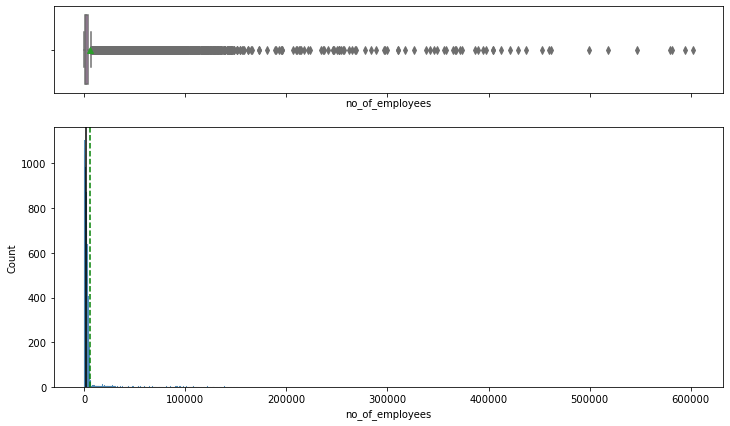

<IPython.core.display.Javascript object>

In [19]:
histogram_boxplot(data, "no_of_employees")  # histogram_boxplot for number of employees

In [20]:
data[data.no_of_employees > 50000]  # shows rows with employees greater than 50,000

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
12,Asia,Bachelor's,Y,N,123876,1963,Northeast,28663.0500,Year,Y,Certified
16,Europe,Master's,Y,N,76638,1991,Midwest,3706.7900,Year,Y,Certified
99,Asia,Master's,N,N,107535,1970,West,159645.5100,Year,Y,Denied
134,Asia,Doctorate,Y,Y,113282,2011,Midwest,164893.0000,Year,Y,Certified
141,Asia,Master's,Y,N,73909,2004,Midwest,60821.7500,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...
25308,North America,Master's,N,N,82953,1977,Northeast,42.7705,Hour,Y,Denied
25343,Asia,Master's,Y,N,53376,1875,South,58641.8900,Year,Y,Certified
25349,Asia,High School,Y,N,89016,1965,South,223.0344,Hour,Y,Certified
25379,North America,Master's,Y,N,96022,1999,Northeast,80519.6500,Year,Y,Certified


<IPython.core.display.Javascript object>

In [21]:
data.no_of_employees.nlargest(
    20
)  # shows top 20 number of employees and their corresponding case_id

21339    602069
1345     594472
20345    581468
11317    579004
9587     547172
2783     517884
15268    499720
8626     461527
24071    459450
23176    453142
13144    437064
3731     428773
4120     421062
3864     412207
4137     404715
15925    403959
4749     397360
979      394921
15089    389595
19456    386278
Name: no_of_employees, dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
- Many outliers, but are probably valid. Meaning most companies are small, but some have a large amount of employees

### Prevailing wage

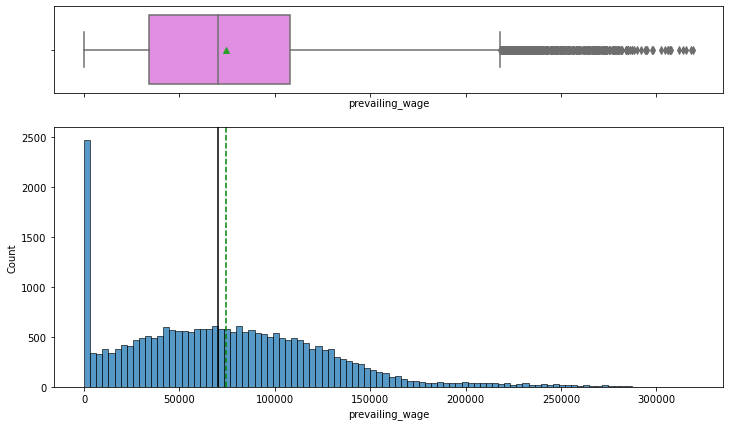

<IPython.core.display.Javascript object>

In [22]:
histogram_boxplot(
    data, "prevailing_wage", bins=100
)  # histogram_boxplot for prevailing wage

In [23]:
data.prevailing_wage.nlargest(
    20
)  # shows top 20 prevailing wages and their corresponding case_id

21077    319210.27
14810    318446.05
12215    315497.60
16223    314156.06
20957    311734.49
14816    307716.10
5354     307410.02
15589    306982.28
11124    306206.67
4757     306021.96
5829     304543.67
18276    302513.77
6330     298520.02
17625    297589.88
17385    294945.51
13891    294807.32
8407     294258.80
2366     292106.59
10150    289878.68
1607     288318.91
Name: prevailing_wage, dtype: float64

<IPython.core.display.Javascript object>

In [24]:
data.loc[
    data["prevailing_wage"] < 100, "unit_of_wage"
].value_counts()  # the count of the values in the prevailing wages column below 100 and sorted by unit of wage

Hour    176
Name: unit_of_wage, dtype: int64

<IPython.core.display.Javascript object>

In [25]:
# shows rows with prevailing wage below 20, sorted from smallest to greatest by prevailing wage
data.loc[data["prevailing_wage"] < 20].sort_values(by="prevailing_wage")

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
20575,North America,Master's,N,N,1552,2004,Northeast,2.1367,Hour,Y,Certified
22855,North America,High School,Y,N,564,1991,South,2.9561,Hour,Y,Denied
17448,South America,Master's,Y,N,4421,1999,Northeast,3.0031,Hour,Y,Denied
634,Asia,Master's,N,N,834,1977,Northeast,3.3188,Hour,Y,Denied
5455,North America,Doctorate,Y,Y,2038,2007,Northeast,3.4889,Hour,Y,Certified
13544,North America,High School,Y,N,3191,2003,Northeast,5.0899,Hour,Y,Denied
19425,North America,Bachelor's,Y,N,2051,2004,Northeast,5.1868,Hour,Y,Denied
19593,Asia,Master's,N,N,528,2004,Northeast,5.4108,Hour,Y,Certified
8914,Asia,Bachelor's,N,N,4427,1998,Northeast,5.6396,Hour,Y,Denied
20482,North America,Bachelor's,N,N,2584,1900,South,6.3305,Hour,Y,Denied


<IPython.core.display.Javascript object>

#### Observations:
- Many outliers, but are probably valid. Pay ranges have wide gaps depending on level of employment.
- For wages under the minimum wage, it is unsure what the currency is. Thus, the wages can not be changed.
- Similarly, the unit of wage can not be adjusted to normalize this wage. There is no way to know how many days, hours, or weeks the employee has worked in order to convert them all.

### Year of Establishment

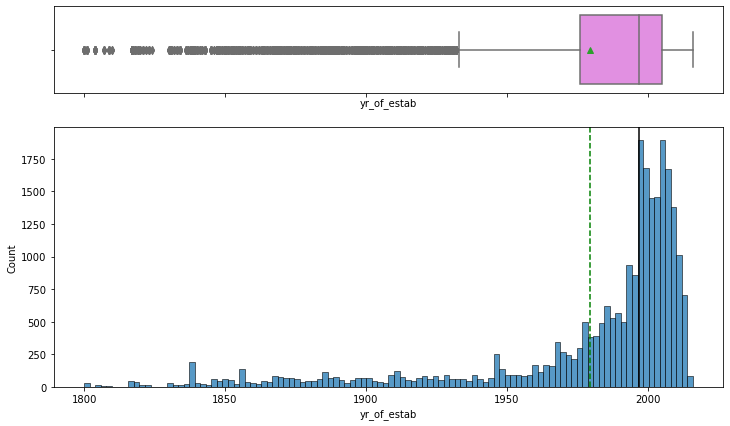

<IPython.core.display.Javascript object>

In [26]:
histogram_boxplot(data, "yr_of_estab")  # histogram_boxplot for year of establishment

#### Observations:
- Many outliers, but are probably valid. There is more of a demand for employees the greater the population grows.
- Left skewed distribution

In [27]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

### Continent

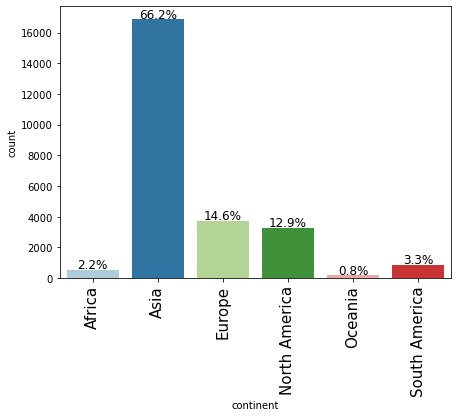

<IPython.core.display.Javascript object>

In [28]:
labeled_barplot(data, "continent", perc=True)  # labeled barplot for continent

### Education of employee

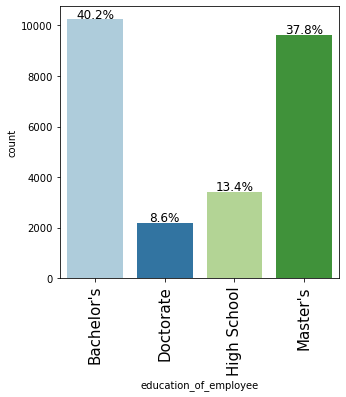

<IPython.core.display.Javascript object>

In [29]:
labeled_barplot(
    data, "education_of_employee", perc=True
)  # labeled barplot for education of employee

#### Observations:
- Most applicants have a college education. Meaning that they are educated for the most part.
- Bachelor's and Master's degrees are very close to one another with 40% and 38% respectively.

### Has job experience

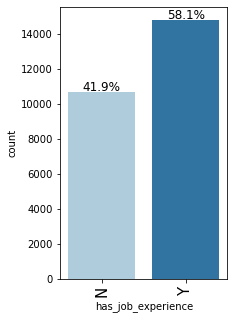

<IPython.core.display.Javascript object>

In [30]:
labeled_barplot(
    data, "has_job_experience", perc=True
)  # labeled barplot for has job experience

#### Observations:
- Most applicants have a job experience. 58% has job experience, while 42% does not.

### Requires job training

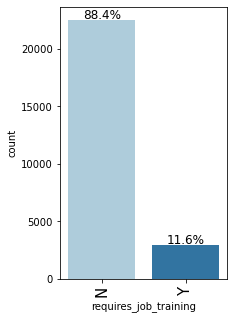

<IPython.core.display.Javascript object>

In [31]:
labeled_barplot(
    data, "requires_job_training", perc=True
)  # labeled barplot for requres job training

#### Observations:
- Most applicants do not require job training. 88% do not require job training.

### Region of employment

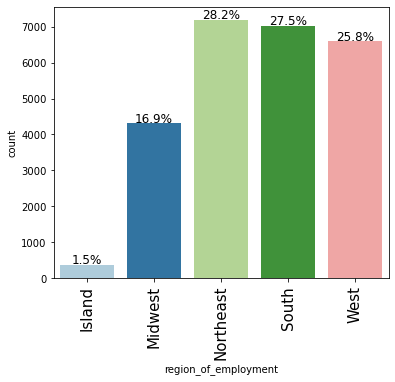

<IPython.core.display.Javascript object>

In [32]:
labeled_barplot(
    data, "region_of_employment", perc=True
)  # labeled barplot for region of employment

#### Observations:
- Most applicants region of living is close to the coast lines. This may be due to most major cities being on the coast lines.
- Northeast is the most with 28%.
- South has 27.5%.
- West has 26%.

### Unit of wage

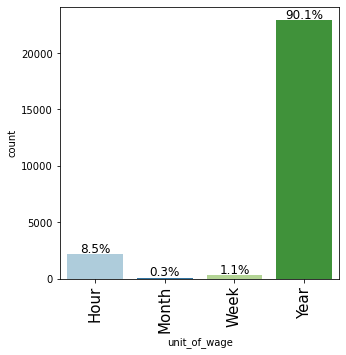

<IPython.core.display.Javascript object>

In [33]:
labeled_barplot(data, "unit_of_wage", perc=True)  # labeled barplot for unit of wage

#### Observations:
- Most applicants recieve they're total income on a yearly basis. Thus, they are mostly salary applicants, and not working on a contractual basis.
- Thus, most companies are invested long term with their employees before the employee begins the application process.

### Full time position

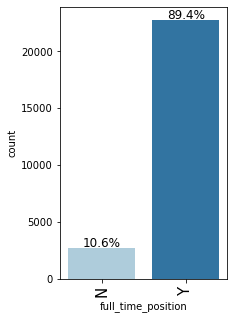

<IPython.core.display.Javascript object>

In [34]:
labeled_barplot(
    data, "full_time_position", perc=True
)  # labeled barplot for full time position

#### Observations:
- Most applicants have full time positions. Almost 90% of applicants have a full time position.
- Reiterating that companies have long term investments for most apllicants.

### Case status

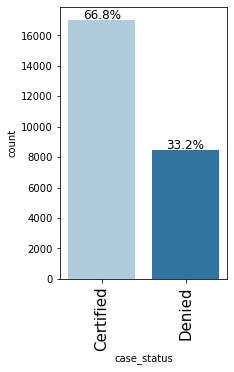

<IPython.core.display.Javascript object>

In [35]:
labeled_barplot(data, "case_status", perc=True)  # labeled barplot for case status

#### Observations:
- Only 2 out of 3 applicants are certified for a Visa.
- Thus, having a long-term commitment from a company or high education does not guarantee a Visa.

### Bivariate Analysis

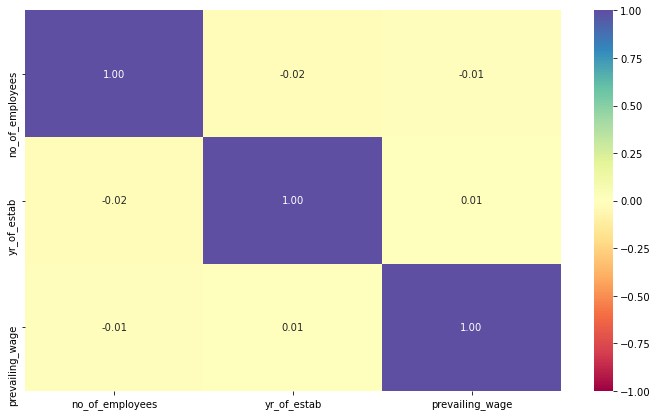

<IPython.core.display.Javascript object>

In [36]:
# creates list of numerical column names that are continuos.
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)  # heatmap showing correlation between the numerical variables
plt.show()

#### Observations:
- There is no correlation between columns.

In [37]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

### Continent vs Case Status

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


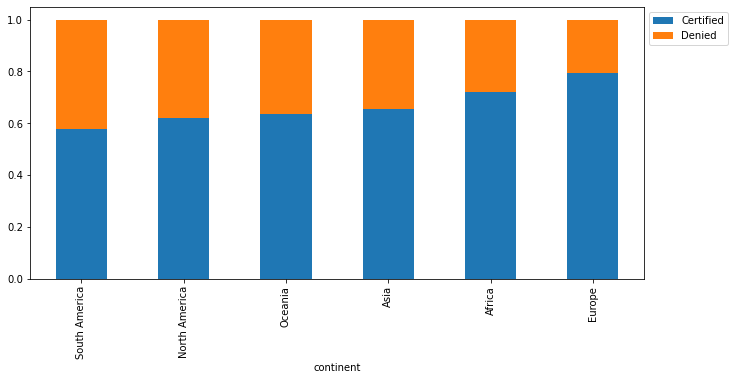

<IPython.core.display.Javascript object>

In [38]:
stacked_barplot(
    data, "continent", "case_status"
)  # stacked barplot for continent and case status

#### Observations:
- The highest approval rate comes from europe at about a 80% approval rate, while the least is from south america at about a 60% approval rate.
- 66% of all applicants come from Asia, Most certified and denied case status's come from Asia. The number of applicants is about 4.5 times the amount of the number 2 country.

### Education of Employee vs Case Status

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


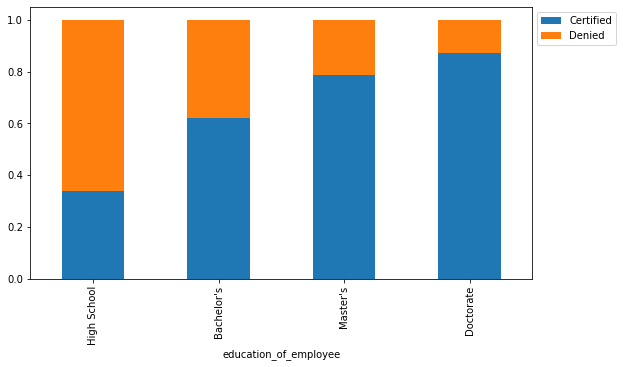

<IPython.core.display.Javascript object>

In [39]:
stacked_barplot(
    data, "education_of_employee", "case_status"
)  # stacked barplot for continent and case status

#### Observations:
- The higher the education level the greater the chance of approval.
- Doctors are close to 90%, Master's graduates are close to 80%. Bachelor's are close to 60%, and the approval rate really drops off for high school graduates at about 30%.
- Most applicants have Bachelor's and Master's degrees.

### Job Experience vs Case Status

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


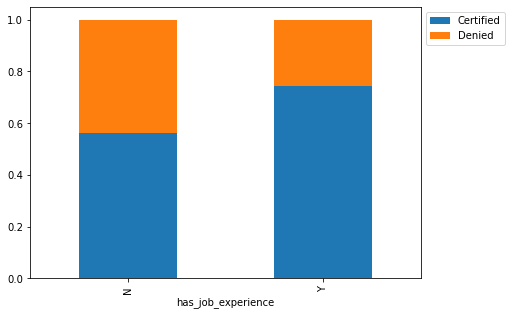

<IPython.core.display.Javascript object>

In [40]:
stacked_barplot(
    data, "has_job_experience", "case_status"
)  # stacked barplot for continent and case status

#### Observations:
- It seems to be proven that those with job experience have a higher chance to be certified. Those with job experience have almost a 10% greater chance than those with no job experience.
- Those with job experience apply the most.
- Are applicants with job training requiring more training, or are they being highered for their current job/role?

### Job Experience vs Requires Job Training

requires_job_training      N     Y    All
has_job_experience                       
All                    22525  2955  25480
N                       8988  1690  10678
Y                      13537  1265  14802
------------------------------------------------------------------------------------------------------------------------


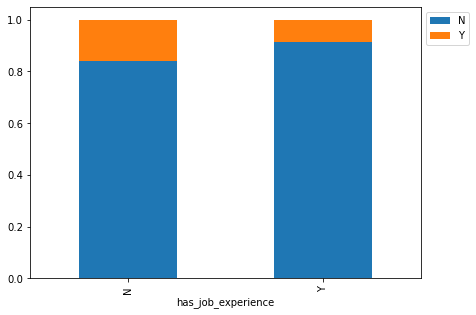

<IPython.core.display.Javascript object>

In [41]:
stacked_barplot(
    data, "has_job_experience", "requires_job_training"
)  # stacked barplot for continent and case status

#### Observations:
- It seems to be proven that those with job experience have do not need training as much as those without job experience.
- Most applicants do not need training regardless of having job experience or not.

### Requires Job Training vs Case Status

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


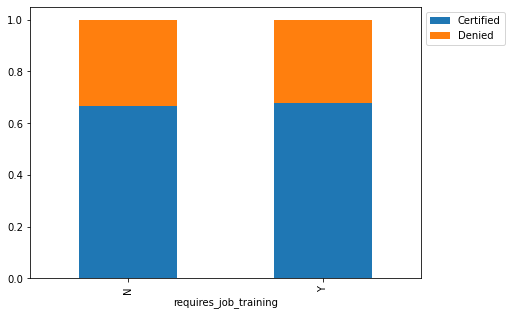

<IPython.core.display.Javascript object>

In [42]:
stacked_barplot(
    data, "requires_job_training", "case_status"
)  # stacked barplot for continent and case status

#### Observations:
- There seems to be no difference in case status with regards to requiring job training or not.

### Region of Employment vs Case Status

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


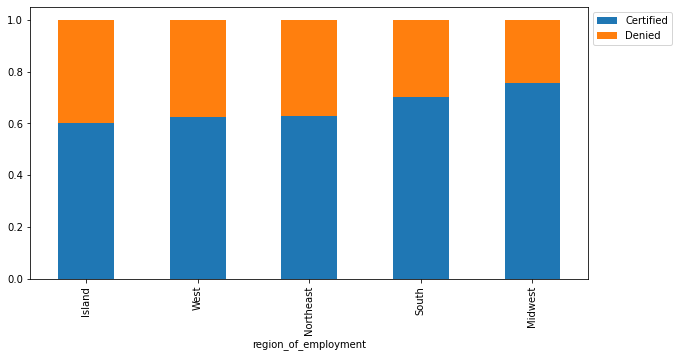

<IPython.core.display.Javascript object>

In [43]:
stacked_barplot(
    data, "region_of_employment", "case_status"
)  # stacked barplot for continent and case status

#### Observations:
- Midwest has the highest rate of certified applicants, followed closely by South.

### Region requirements for education

education_of_employee  Bachelor's  Doctorate  High School  Master's    All
region_of_employment                                                      
All                         10234       2192         3420      9634  25480
West                         2925        714          785      2162   6586
Northeast                    2874        656          905      2760   7195
South                        2991        541          934      2551   7017
Midwest                      1315        256          736      2000   4307
Island                        129         25           60       161    375
------------------------------------------------------------------------------------------------------------------------


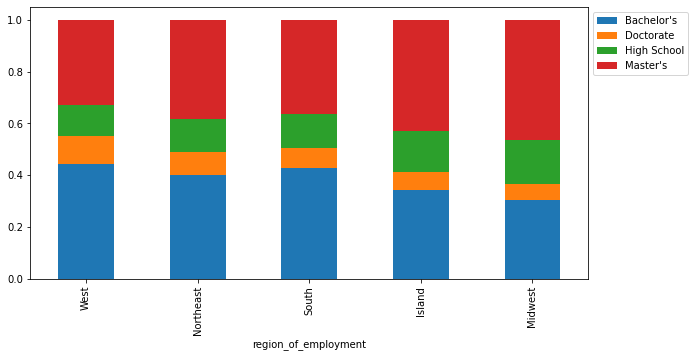

<IPython.core.display.Javascript object>

In [44]:
stacked_barplot(
    data, "region_of_employment", "education_of_employee"
)  # stacked barplot for continent and case status

#### Observations:
- Midwest aims for the highest levels of education, followed by Island, South, Northeast, and West.
- It seems coastal cities car less about education level, or are in more demand despite education level and do not need to be particular for their chioces.

### Prevailing Wage by Region

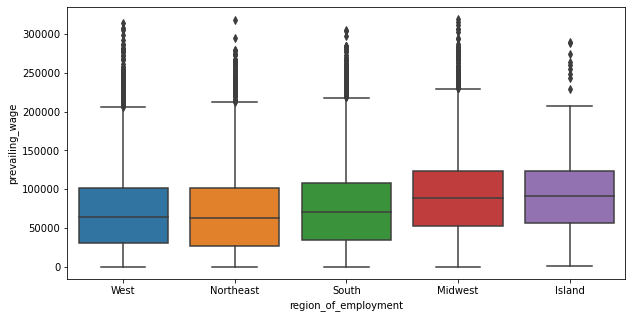

<IPython.core.display.Javascript object>

In [45]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=data, y="prevailing_wage", x="region_of_employment"
)  # Boxplot for education level of employee and prevailing wage
plt.show()

#### Observations:
- Midwest has highest average of prevailing wage, which correlate with its highest average education level.
- The coastal cities have the lowest average prevailing wage.

### Prevailing Wage by Education

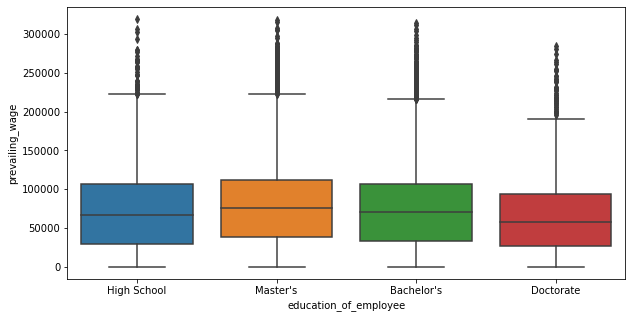

<IPython.core.display.Javascript object>

In [46]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=data, y="prevailing_wage", x="education_of_employee"
)  # Boxplot for education level of employee and prevailing wage
plt.show()

#### Observations:
- It seems that level of education does mean a higher level of prevailing wage.
- Thus, each region will have a higher average level of prevailing wage regarding the level of education in those regions.
- Which region has the greatest total prevailing wage?

### Prevailing Wage by Region Totals.

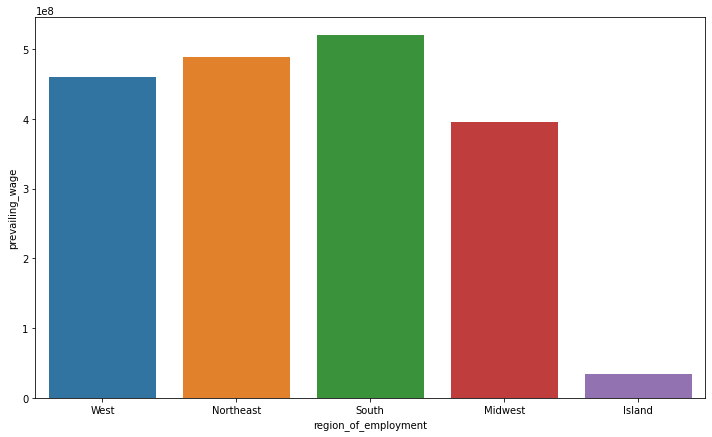

<IPython.core.display.Javascript object>

In [47]:
plt.figure(figsize=(12, 7))
sns.barplot(
    data=data, x="region_of_employment", y="prevailing_wage", ci=None, estimator=sum,
)
plt.show()

#### Observations:
- South has highest total amount of prevailing wage.
- Midwest, which has the highest average prevailing wage, is teh second to lowest total prevailing wage.

### Prevailing Wage vs Case Status

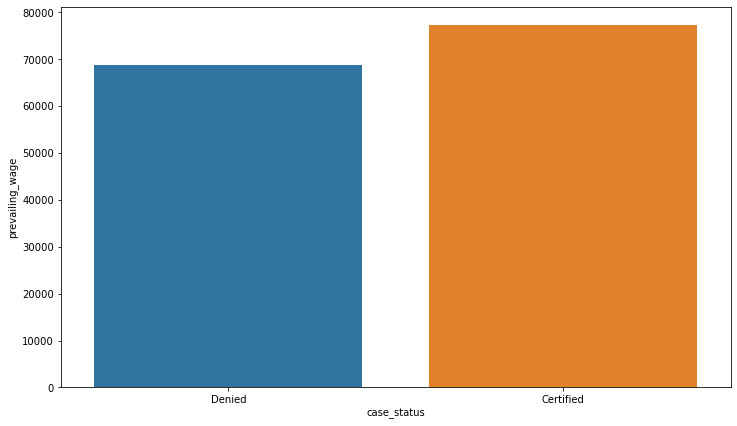

<IPython.core.display.Javascript object>

In [48]:
plt.figure(figsize=(12, 7))
sns.barplot(data=data, x="case_status", y="prevailing_wage", ci=None)
plt.show()

#### Observations:
- The higher the prevailing wage the greater the chance that a certified visa status will be issued.
- Certified status's had an average prevailing wage higher than Declined status's by almost 5,000.
- Some of these are yearly income, and some are hourly, but overall for the most part the average premise is the same.

### Unit of Wage vs Case Status

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


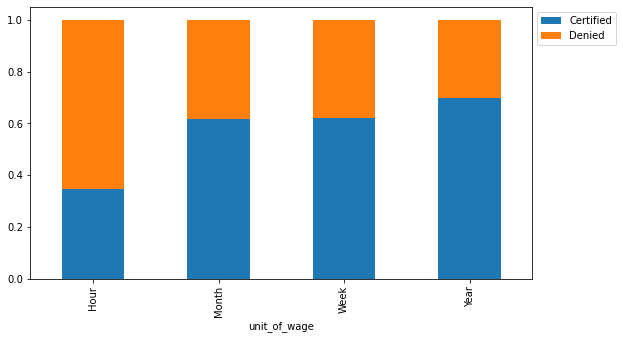

<IPython.core.display.Javascript object>

In [49]:
stacked_barplot(
    data, "unit_of_wage", "case_status"
)  # stacked barplot for continent and case status

#### Observations:
- Hourly wages are at a drastic disadvantage when it comes to certified case status. Hourly rate applicants get aapproved at a rate of about 35%.
- Yearly wage applicants get approved at a rate of about 70%.
- The longer the unit of wage the higher the rate that the applicant is certified.

### Full Time Position vs Case Status

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


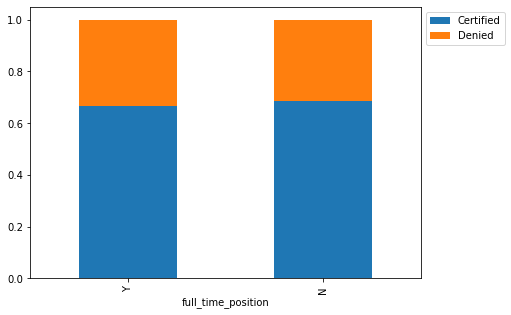

<IPython.core.display.Javascript object>

In [50]:
stacked_barplot(
    data, "full_time_position", "case_status"
)  # stacked barplot for continent and case status

#### Observations:
- Full time position has no change in case status.

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 
    - Yes. The higher the education level the higher the rate of certified status. Doctors are close to 90%, Master's graduates are close to 80%. Bachelor's are close to 60%, and the approval rate really drops off for high school graduates at about 30%.


2. How does the visa status vary across different continents? 
    - The highest approval rate comes from europe with a certified rate of about 80%, while the least is from south america at just under 60%. Africa(70%), Asia(68%), Oceania(65%), North America (63%).
    - 66% of all applicants come from Asia, Most certified and denied case status's come from Asia. The number of applicants is about 4.5 times the amount of the number 2 country.


3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
    - Yes. Having work experience leads to an increase in certified status. Those with work experience are certified at about 70% of the time, while those without work experience are certified at about 55% of the time.


4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
    - Year is the unit of wage that is most likely ot be certified for a visa at about 70% of the time. Week is next with around 62%. Month is third at 61%. Hour is last at a measly 35%.
    
    
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?
    - The certified visa status has a greater chance of occuring the higher the prevailing wage is. The average prevailing wage for those that are certified is about 75,000, while the average prevailing wage of those denied is about 68,000.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

#### Observations:
- There does not seem to be a need for outlier detection and treatment, because of the observations made in EDA showing that the continuous values are accurate given domain knowledge.
- There are no missing values to treat.
- Feature Enginering:
    - The prevailing wage regarding the unit of wage seems unfinished. There must be a better way of combining the unit of wage and the prevailing wage, as the hourly and yearly wages are currently bundled together. However, without fully knowing how many hours the hourly employees work there is no way to transfer the hourly to annually, or vice versa.
    - The minimum prevailing wage may also not be below the minimum wage of the said country, but i am not sure how to determine each countries economic structure. Meaning, that they make money with tips such as a waiter in the United States, or some other form of payment unknown to me.
    - The prevailing wage does seem to have some numbers that seem incorrect, such as an hourly wage at 2, and an hourly wage near 1,000. I think this is due to the currency disrepency for the currency in said country. Since there is no specific currency placed on the prevailing wage. i do not know what currency they are using, thus i can not convert it to a flat normalized currency. The prevailing wage numbers will just remain as is.
- Thus, we will not use feature engineering.

### Data Preparation for Modeling

In [51]:
# creates dictionary replacing rows that contain only two values
replaceStruct = {
    "has_job_experience": {"N": 0, "Y": 1},
    "requires_job_training": {"N": 0, "Y": 1},
    "full_time_position": {"N": 0, "Y": 1},
    "case_status": {"Denied": 0, "Certified": 1},
}

# replaces values with the replaceStruct dictionary made above
data = data.replace(replaceStruct)

X = data.copy()  # create copy of data as X
Y = data["case_status"]  # creates Y, which is output of our models

# create dummy variables for the categorcial columns that contain more than two values
X = pd.get_dummies(
    data,
    columns=[
        "continent",
        "education_of_employee",
        "region_of_employment",
        "unit_of_wage",
    ],
    drop_first=True,
)

X.drop("case_status", axis=1, inplace=True)  # drops case_status column in X
X.head().T  # displays tranverse of first five rows of X

,0,1,2,3,4
has_job_experience,0.0000,1.00,0.00,0.00,1.00
requires_job_training,0.0000,0.00,1.00,0.00,0.00
no_of_employees,14513.0000,2412.00,44444.00,98.00,1082.00
yr_of_estab,2007.0000,2002.00,2008.00,1897.00,2005.00
prevailing_wage,592.2029,83425.65,122996.86,83434.03,149907.39
full_time_position,1.0000,1.00,1.00,1.00,1.00
continent_Asia,1.0000,1.00,1.00,1.00,0.00
continent_Europe,0.0000,0.00,0.00,0.00,0.00
continent_North America,0.0000,0.00,0.00,0.00,0.00
continent_Oceania,0.0000,0.00,0.00,0.00,0.00


<IPython.core.display.Javascript object>

In [52]:
# create test train split for training and testing models
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [53]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
1    0.663602
0    0.336398
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.677917
0    0.322083
Name: case_status, dtype: float64


<IPython.core.display.Javascript object>

#### Observations:
- The train_test split is about 67:33 which is close to the target of 70:30 split.

## EDA

- It is a good idea to explore the data once again after manipulating it.

- Since no changes were made besides the dummy variables and the column variables restructured. There is not reason to do EDA here.

In [54]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [55]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

## Building bagging and boosting models

### Recall, Precision, or F1?

- A visa is certified but was predicited as denied, then the employee will miss out on a great oppurtunity and the company will lose a worthy asset.
- A visa is denied but was predicited as certified, then the company will waste time and effort finding a suitable canidate, which will utlimately lead to the incorrect, rushed hire.
- `F1 score` is the appropriate metric as both the False Positive and False Negative are important.

### Decision Tree

In [56]:
dtree = DecisionTreeClassifier(criterion="gini", random_state=1)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [57]:
dtree = DecisionTreeClassifier(criterion="gini", random_state=1)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [58]:
dtree_classifier_train_perf = model_performance_classification_sklearn(
    dtree, X_train, y_train
)
print("Training performance \n", dtree_classifier_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


<IPython.core.display.Javascript object>

In [59]:
dtree_classifier_test_perf = model_performance_classification_sklearn(
    dtree, X_test, y_test
)
print("Testing performance \n", dtree_classifier_test_perf)

Testing performance 
    Accuracy   Recall  Precision        F1
0  0.661826  0.74257   0.754658  0.748565


<IPython.core.display.Javascript object>

#### Observations
- Decision Tree works well on training data, but is overfitting as the metrics did not generalize to the testing set.
- With an `F1 score` of 74.9 it is not a very good model.

### Bagging Classifier

In [60]:
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train, y_train)

BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

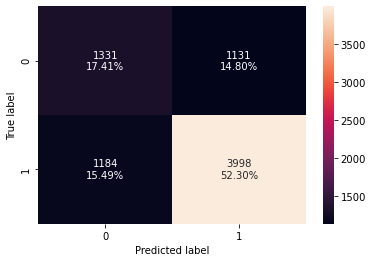

<IPython.core.display.Javascript object>

In [61]:
confusion_matrix_sklearn(bagging_classifier, X_test, y_test)

In [62]:
bagging_classifier_train_perf = model_performance_classification_sklearn(
    bagging_classifier, X_train, y_train
)
print("Training performance \n", bagging_classifier_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.984694  0.985553   0.991332  0.988434


<IPython.core.display.Javascript object>

In [63]:
bagging_classifier_test_perf = model_performance_classification_sklearn(
    bagging_classifier, X_test, y_test
)
print("Testing performance \n", bagging_classifier_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.697148  0.771517   0.779489  0.775482


<IPython.core.display.Javascript object>

#### Observations
- Bagging Classsifier works well on training data, but is overfitting as the metrics did not generalize to the testing set.
- With an `F1 score` of 77.5 it is not a very good model.

### Bagging Classifier with weighted decision tree

In [64]:
bagging_wt = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(
        criterion="gini", class_weight={0: 0.67, 1: 0.33}, random_state=1
    ),
    random_state=1,
)
bagging_wt.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.67,
                                                                      1: 0.33},
                                                        random_state=1),
                  random_state=1)

<IPython.core.display.Javascript object>

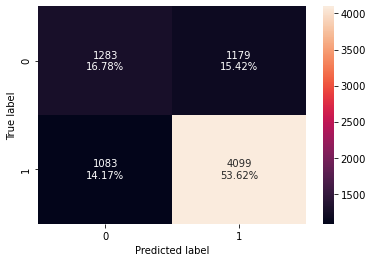

<IPython.core.display.Javascript object>

In [65]:
confusion_matrix_sklearn(bagging_wt, X_test, y_test)

In [66]:
bagging_wt_model_train_perf = model_performance_classification_sklearn(
    bagging_wt, X_train, y_train
)
print("Training performance \n", bagging_wt_model_train_perf)

Training performance 
    Accuracy   Recall  Precision        F1
0  0.986824  0.98927   0.990861  0.990065


<IPython.core.display.Javascript object>

In [67]:
bagging_wt_model_test_perf = model_performance_classification_sklearn(
    bagging_wt, X_test, y_test
)
print("Testing performance \n", bagging_wt_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.704082  0.791007    0.77662  0.783748


<IPython.core.display.Javascript object>

#### Observations
- Weighted Decision Tree Bagging Classsifier works well on training data, but is overfitting as the metrics did not generalize to the testing set.
- With an `F1 score` of 78.4 it not a very good predictive model.

### Random Forest

In [68]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

<IPython.core.display.Javascript object>

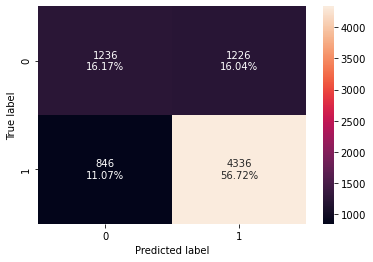

<IPython.core.display.Javascript object>

In [69]:
confusion_matrix_sklearn(rf, X_test, y_test)

In [70]:
rf_model_train_perf = model_performance_classification_sklearn(rf, X_train, y_train)
print("Training performance \n", rf_model_train_perf)

Training performance 
    Accuracy  Recall  Precision        F1
0  0.999944     1.0   0.999916  0.999958


<IPython.core.display.Javascript object>

In [71]:
rf_model_test_perf = model_performance_classification_sklearn(rf, X_test, y_test)
print("Testing performance \n", rf_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.728938  0.836743   0.779576  0.807148


<IPython.core.display.Javascript object>

#### Observations
- Random Forest Classsifier works well on training data, but is overfitting as the metrics did not generalize to the testing set.
- With an `F1 score` of 80.7 it not a very good predictive model.

### AdaBoost

In [72]:
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

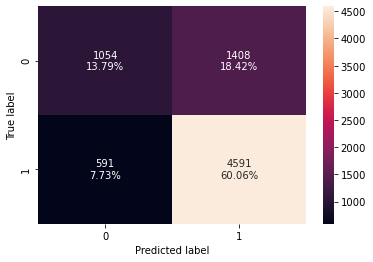

<IPython.core.display.Javascript object>

In [73]:
confusion_matrix_sklearn(ab_classifier, X_test, y_test)

In [74]:
ab_classifier_model_train_perf = model_performance_classification_sklearn(
    ab_classifier, X_train, y_train
)
print("Training performance \n", ab_classifier_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.737441  0.885941    0.75881  0.817462


<IPython.core.display.Javascript object>

In [75]:
ab_classifier_model_test_perf = model_performance_classification_sklearn(
    ab_classifier, X_test, y_test
)
print("Testing performance \n", ab_classifier_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.738488  0.885951   0.765294  0.821215


<IPython.core.display.Javascript object>

#### Observations
- AdaBoost Classsifier works well on training data, and is generalizing the data very well, almost exactly. Best model so far.
- With an `F1 score` of 82.1 it has a good predicting model.

### Gradient Boosting 

In [76]:
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

<IPython.core.display.Javascript object>

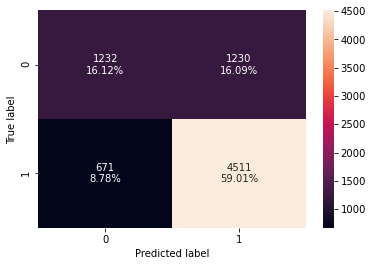

<IPython.core.display.Javascript object>

In [77]:
confusion_matrix_sklearn(gb_classifier, X_test, y_test)

In [78]:
gb_classifier_model_train_perf = model_performance_classification_sklearn(
    gb_classifier, X_train, y_train
)
print("Training performance \n", gb_classifier_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.755607  0.876479   0.781704  0.826383


<IPython.core.display.Javascript object>

In [79]:
gb_classifier_model_test_perf = model_performance_classification_sklearn(
    gb_classifier, X_test, y_test
)
print("Testing performance \n", gb_classifier_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.751308  0.870513   0.785752  0.825964


<IPython.core.display.Javascript object>

#### Observations
- GradientBoosting Classsifier works well on training data, and is generalizing the data very well, almost exactly. Best model so far.
- With an `F1 score` of 82.6 it has a good predicting model.

### XGBoost

In [80]:
xgb_classifier = XGBClassifier(random_state=1)
xgb_classifier.fit(X_train, y_train)

[11:19:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

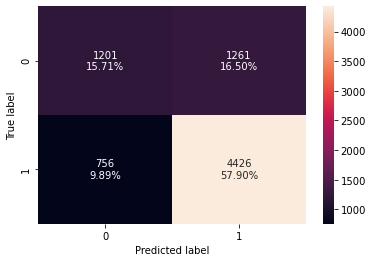

<IPython.core.display.Javascript object>

In [81]:
confusion_matrix_sklearn(xgb_classifier, X_test, y_test)

In [82]:
xgb_classifier_model_train_perf = model_performance_classification_sklearn(
    xgb_classifier, X_train, y_train
)
print("Training performance \n", xgb_classifier_model_train_perf)

Training performance 
    Accuracy   Recall  Precision        F1
0  0.832081  0.92658   0.837623  0.879859


<IPython.core.display.Javascript object>

In [83]:
xgb_classifier_model_test_perf = model_performance_classification_sklearn(
    xgb_classifier, X_test, y_test
)
print("Testing performance \n", xgb_classifier_model_test_perf)

Testing performance 
    Accuracy   Recall  Precision        F1
0  0.736133  0.85411   0.778266  0.814426


<IPython.core.display.Javascript object>

#### Observations
- XGBoost Classsifier works well on training data, and is generalizing the data very well. Gradient Boost model still seems to fair better. Maybe the results will change after tuning.
- With an `F1 score` of 81.4 it has a good predicting model.

##  Will tuning the hyperparameters improve the model performance?

### Tuning Decision Tree

In [84]:
# Choose the type of classifier.
dtree_tuned = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": [np.arange(2, 5, 1), None],
    "min_samples_leaf": np.arange(1, 6, 1),
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001],
}

# Run the grid search
grid = GridSearchCV(dtree_tuned, parameters, scoring="f1", cv=5)
grid = grid.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid.best_estimator_

# Fit the best algorithm to the data.
dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(min_impurity_decrease=0.0001, min_samples_leaf=4,
                       random_state=1)

<IPython.core.display.Javascript object>

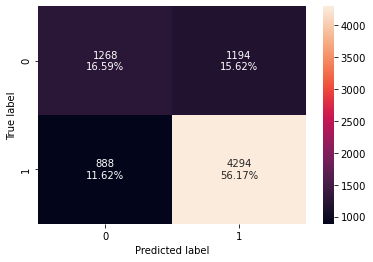

<IPython.core.display.Javascript object>

In [85]:
confusion_matrix_sklearn(dtree_tuned, X_test, y_test)

In [86]:
dtree_tuned_train_perf = model_performance_classification_sklearn(
    dtree_tuned, X_train, y_train
)
print("Training performance \n", dtree_tuned_train_perf)

Training performance 
    Accuracy    Recall  Precision       F1
0  0.788686  0.879858    0.81608  0.84677


<IPython.core.display.Javascript object>

In [87]:
dtree_tuned_test_perf = model_performance_classification_sklearn(
    dtree_tuned, X_test, y_test
)
print("Testing performance \n", dtree_tuned_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0   0.72763  0.828638   0.782434  0.804873


<IPython.core.display.Javascript object>

#### Observations
- Tuned Decision Tree works well on training data, and is generalizing the data very well.
- With an `F1 score` of 80.5 it has a good predicting model.

### Tuning Bagging Classifier with weighted decision tree

In [88]:
# grid search for bagging classifier
parameters = {
    "base_estimator": [
        DecisionTreeClassifier(
            criterion="gini", class_weight={0: 0.67, 1: 0.33}, random_state=1
        )
    ],
    "n_estimators": [10, 50, 100, 200],
    "max_features": [0.7, 0.8, 0.9, 1],
}
grid = GridSearchCV(
    BaggingClassifier(random_state=1, bootstrap=True),
    param_grid=parameters,
    scoring="f1",
    cv=5,
)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=1),
             param_grid={'base_estimator': [DecisionTreeClassifier(class_weight={0: 0.67,
                                                                                 1: 0.33},
                                                                   random_state=1)],
                         'max_features': [0.7, 0.8, 0.9, 1],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='f1')

<IPython.core.display.Javascript object>

In [89]:
# getting the best estimator
bagging_tuned = grid.best_estimator_
bagging_tuned.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.67,
                                                                      1: 0.33},
                                                        random_state=1),
                  max_features=0.7, n_estimators=200, random_state=1)

<IPython.core.display.Javascript object>

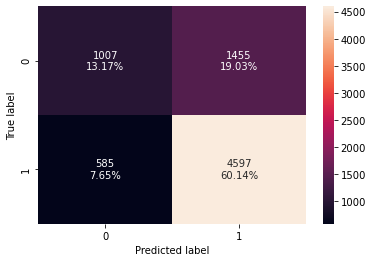

<IPython.core.display.Javascript object>

In [90]:
confusion_matrix_sklearn(bagging_tuned, X_test, y_test)

In [91]:
bagging_tuned_model_train_perf = model_performance_classification_sklearn(
    bagging_tuned, X_train, y_train
)
print("Training performance \n", bagging_tuned_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


<IPython.core.display.Javascript object>

In [92]:
bagging_tuned_model_test_perf = model_performance_classification_sklearn(
    bagging_tuned, X_test, y_test
)
print("Testing performance \n", bagging_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.733124  0.887109   0.759584  0.818408


<IPython.core.display.Javascript object>

#### Observations
- Tuned Weighted Decision Tree Bagging Classsifier works well on training data, but is overfitting as the metrics did not generalize to the testing set.
- With an `F1 score` of 81.8 it has a good predicting model.

### Random Forest

In [93]:
# set random forest classifier
rf_tuned = RandomForestClassifier(random_state=1)

# parameters to choose from in grid
parameters = {
    "n_estimators": [125, 250, 500],
    "min_samples_leaf": np.arange(1, 6, 1),
    "max_features": [0.6, 0.7, 0.8, 0.9],
    "max_samples": [0.7, 0.8, 0.9, None],
}

# Run GridSearchCV
grid = GridSearchCV(rf_tuned, param_grid=parameters, scoring="f1", cv=5)
grid = grid.fit(X_train, y_train)

# set tuned model to best combination of paramters
rf_tuned = grid.best_estimator_

# fit best algorithm to data
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features=0.6, max_samples=0.7, min_samples_leaf=5,
                       n_estimators=500, random_state=1)

<IPython.core.display.Javascript object>

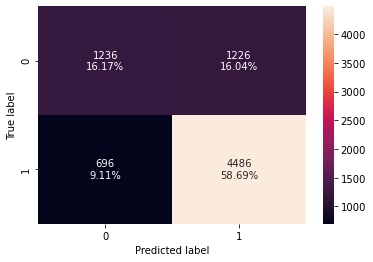

<IPython.core.display.Javascript object>

In [94]:
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

In [95]:
rf_tuned_model_train_perf = model_performance_classification_sklearn(
    rf_tuned, X_train, y_train
)
print("Training performance \n", rf_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.833875  0.929284   0.838019  0.881295


<IPython.core.display.Javascript object>

In [96]:
rf_tuned_model_test_perf = model_performance_classification_sklearn(
    rf_tuned, X_test, y_test
)
print("Testing performance \n", rf_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.748561  0.865689   0.785364  0.823573


<IPython.core.display.Javascript object>

#### Observations
- Tuned Random Forest Classsifier works well on training data, but is slightly overfitting as the metrics on just on threshold of not generalizing to the testing set.
- With an `F1 score` of 82.4 it has a good predicting model.

### AdaBoost

In [97]:
# Choose the type of classifier.
ab_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(10, 100, 250),
    "learning_rate": [1, 0.1, 0.5, 0.01],
}

# Run the grid search
grid = GridSearchCV(ab_tuned, parameters, scoring="f1", cv=5)
grid = grid.fit(X_train, y_train)

# Set the clf to the best combination of parameters
ab_tuned = grid.best_estimator_

# Fit the best algorithm to the data.
ab_tuned.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=10, random_state=1)

<IPython.core.display.Javascript object>

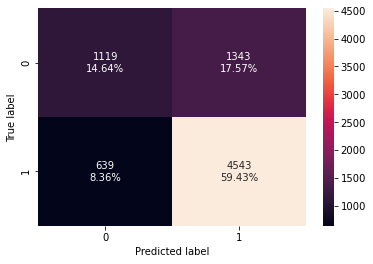

<IPython.core.display.Javascript object>

In [98]:
confusion_matrix_sklearn(ab_tuned, X_test, y_test)

In [99]:
ab_tuned_model_train_perf = model_performance_classification_sklearn(
    ab_tuned, X_train, y_train
)
print("Training performance \n", ab_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0   0.73688  0.877239   0.762167  0.815664


<IPython.core.display.Javascript object>

In [100]:
ab_tuned_model_test_perf = model_performance_classification_sklearn(
    ab_tuned, X_test, y_test
)
print("Testing performance \n", ab_tuned_model_train_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0   0.73688  0.877239   0.762167  0.815664


<IPython.core.display.Javascript object>

#### Observations
- Tuned AdaBoost Classsifier works well on training data, and is generalizing the data very well, exactly.
- With an `F1 score` of 81.6 it has a good predicting model.

### Gradient Boosting 

In [101]:
# Choose the type of classifier.
gb_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(50, 200, 300),
    "subsample": [0.7, 0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
    "max_depth": [3, 5, 7, 10],
}

# Run the grid search
grid = GridSearchCV(gb_tuned, parameters, scoring="f1", cv=5)
grid = grid.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned = grid.best_estimator_

# Fit the best algorithm to the data.
gb_tuned.fit(X_train, y_train)

GradientBoostingClassifier(max_features=0.7, n_estimators=50, random_state=1,
                           subsample=0.9)

<IPython.core.display.Javascript object>

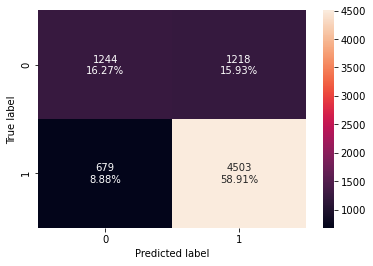

<IPython.core.display.Javascript object>

In [102]:
confusion_matrix_sklearn(gb_tuned, X_test, y_test)

In [103]:
gb_tuned_model_train_perf = model_performance_classification_sklearn(
    gb_tuned, X_train, y_train
)
print("Training performance \n", gb_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.750561  0.873268    0.77802  0.822897


<IPython.core.display.Javascript object>

In [104]:
gb_tuned_model_test_perf = model_performance_classification_sklearn(
    gb_tuned, X_test, y_test
)
print("Testing performance \n", gb_tuned_model_test_perf)

Testing performance 
    Accuracy   Recall  Precision        F1
0  0.751832  0.86897     0.7871  0.826011


<IPython.core.display.Javascript object>

#### Observations
- Tuned GradientBoosting Classsifier works well on training data, and is generalizing the data very well, almost exactly.
- With an `F1 score` of 82.6 it has a good predicting model.

### XGBoost

In [105]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(disable_default_eval_metric=True, random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [50, 100, 150, 200],
    "subsample": [0.7, 0.8, 0.9, 1],
    "gamma": [0, 1, 3, 5],
    "colsample_bytree": [0.7, 0.8, 0.9, 1],
    "colsample_bylevel": [0.7, 0.8, 0.9, 1],
}

# Run the grid search
grid = GridSearchCV(xgb_tuned, parameters, scoring="f1", cv=5)
grid = grid.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1,
              disable_default_eval_metric=True, enable_categorical=False,
              gamma=5, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

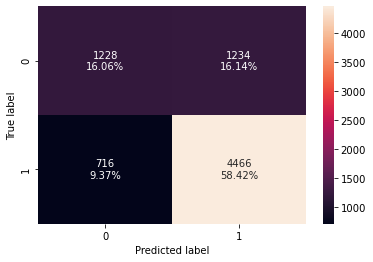

<IPython.core.display.Javascript object>

In [106]:
confusion_matrix_sklearn(xgb_tuned, X_test, y_test)

In [107]:
xgb_tuned_model_train_perf = model_performance_classification_sklearn(
    xgb_tuned, X_train, y_train
)
print("Training performance \n", xgb_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision       F1
0   0.76895  0.885096   0.791418  0.83564


<IPython.core.display.Javascript object>

In [108]:
xgb_tuned_model_test_perf = model_performance_classification_sklearn(
    xgb_tuned, X_test, y_test
)
print("Testing performance \n", xgb_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.744898  0.861829   0.783509  0.820805


<IPython.core.display.Javascript object>

#### Observations
- Tuned XGBoosting Classsifier works well on training data, and is generalizing the data very well, almost exactly.
- With an `F1 score` of 82 it has a good predicting model.

### Stacking Model

In [109]:
estimators = [
    ("Decision Tree", dtree_tuned),
    ("Random Forest", rf_tuned),
    ("Gradient Boosting", gb_tuned),
]
final_estimator = XGBClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [110]:
stacking_estimator = StackingClassifier(
    estimators=estimators, final_estimator=final_estimator, cv=5
)
stacking_estimator.fit(X_train, y_train)

[16:50:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


StackingClassifier(cv=5,
                   estimators=[('Decision Tree',
                                DecisionTreeClassifier(min_impurity_decrease=0.0001,
                                                       min_samples_leaf=4,
                                                       random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_features=0.6,
                                                       max_samples=0.7,
                                                       min_samples_leaf=5,
                                                       n_estimators=500,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(max_features=0.7,
                                                           n_estimators=50,
                                                           rando...
    

<IPython.core.display.Javascript object>

In [111]:
stacking_estimator_model_train_perf = model_performance_classification_sklearn(
    stacking_estimator, X_train, y_train
)
print("Training performance \n", stacking_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.754766  0.879689   0.779225  0.826415


<IPython.core.display.Javascript object>

In [112]:
stacking_estimator_model_test_perf = model_performance_classification_sklearn(
    stacking_estimator, X_test, y_test
)
print("Testing performance \n", stacking_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.742412  0.857584   0.783084  0.818642


<IPython.core.display.Javascript object>

#### Observations
- Stacking Model works well on training data, and is generalizing the data very well.
- With an `F1 score` of 81.9 it has a good predicting model.

## Model Performance Comparison and Conclusions

In [113]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dtree_classifier_train_perf.T,
        dtree_tuned_train_perf.T,
        bagging_classifier_train_perf.T,
        bagging_wt_model_train_perf.T,
        bagging_tuned_model_train_perf.T,
        rf_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        ab_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gb_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_estimator_model_train_perf.T,
    ],
    axis=1,
)

models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Bagging Classifier",
    "Bagging w/ Weighted Decision Tree",
    "Bagging Tuned",
    "Random Forest",
    "Random Forest Tuned",
    "Adaboost Classifier",
    "Adaboost Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Tuned",
    "XGB Classifier",
    "XGB Tuned",
    "Stacking Model",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Tuned,Bagging Classifier,Bagging w/ Weighted Decision Tree,Bagging Tuned,Random Forest,Random Forest Tuned,Adaboost Classifier,Adaboost Tuned,Gradient Boost Classifier,Gradient Boost Tuned,XGB Classifier,XGB Tuned,Stacking Model
Accuracy,1.0,0.788686,0.984694,0.986824,1.0,0.999944,0.833875,0.737441,0.736880,0.755607,0.750561,0.832081,0.768950,0.754766
Recall,1.0,0.879858,0.985553,0.989270,1.0,1.000000,0.929284,0.885941,0.877239,0.876479,0.873268,0.926580,0.885096,0.879689
Precision,1.0,0.816080,0.991332,0.990861,1.0,0.999916,0.838019,0.758810,0.762167,0.781704,0.778020,0.837623,0.791418,0.779225
F1,1.0,0.846770,0.988434,0.990065,1.0,0.999958,0.881295,0.817462,0.815664,0.826383,0.822897,0.879859,0.835640,0.826415


<IPython.core.display.Javascript object>

In [114]:
# training performance comparison

models_test_comp_df = pd.concat(
    [
        dtree_classifier_test_perf.T,
        dtree_tuned_test_perf.T,
        bagging_classifier_test_perf.T,
        bagging_wt_model_test_perf.T,
        bagging_tuned_model_test_perf.T,
        rf_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        ab_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gb_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_estimator_model_test_perf.T,
    ],
    axis=1,
)

models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Bagging Classifier",
    "Bagging w/ Weighted Decision Tree",
    "Bagging Tuned",
    "Random Forest",
    "Random Forest Tuned",
    "Adaboost Classifier",
    "Adaboost Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Tuned",
    "XGB Classifier",
    "XGB Tuned",
    "Stacking Model",
]

print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Tuned,Bagging Classifier,Bagging w/ Weighted Decision Tree,Bagging Tuned,Random Forest,Random Forest Tuned,Adaboost Classifier,Adaboost Tuned,Gradient Boost Classifier,Gradient Boost Tuned,XGB Classifier,XGB Tuned,Stacking Model
Accuracy,0.661826,0.727630,0.697148,0.704082,0.733124,0.728938,0.748561,0.738488,0.740712,0.751308,0.751832,0.736133,0.744898,0.742412
Recall,0.742570,0.828638,0.771517,0.791007,0.887109,0.836743,0.865689,0.885951,0.876689,0.870513,0.868970,0.854110,0.861829,0.857584
Precision,0.754658,0.782434,0.779489,0.776620,0.759584,0.779576,0.785364,0.765294,0.771831,0.785752,0.787100,0.778266,0.783509,0.783084
F1,0.748565,0.804873,0.775482,0.783748,0.818408,0.807148,0.823573,0.821215,0.820925,0.825964,0.826011,0.814426,0.820805,0.818642


<IPython.core.display.Javascript object>

In [115]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        gb_tuned.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                        Imp
education_of_employee_High School  0.295246
has_job_experience                 0.170332
prevailing_wage                    0.138349
education_of_employee_Master's     0.105622
education_of_employee_Doctorate    0.066893
continent_Europe                   0.065243
unit_of_wage_Year                  0.037523
region_of_employment_Midwest       0.030088
region_of_employment_West          0.023404
continent_North America            0.016507
region_of_employment_South         0.011248
region_of_employment_Northeast     0.008847
continent_Asia                     0.007076
full_time_position                 0.005908
no_of_employees                    0.005542
continent_South America            0.004986
yr_of_estab                        0.003460
requires_job_training              0.002828
continent_Oceania                  0.000684
unit_of_wage_Week                  0.000215
unit_of_wage_Month                 0.000000


<IPython.core.display.Javascript object>

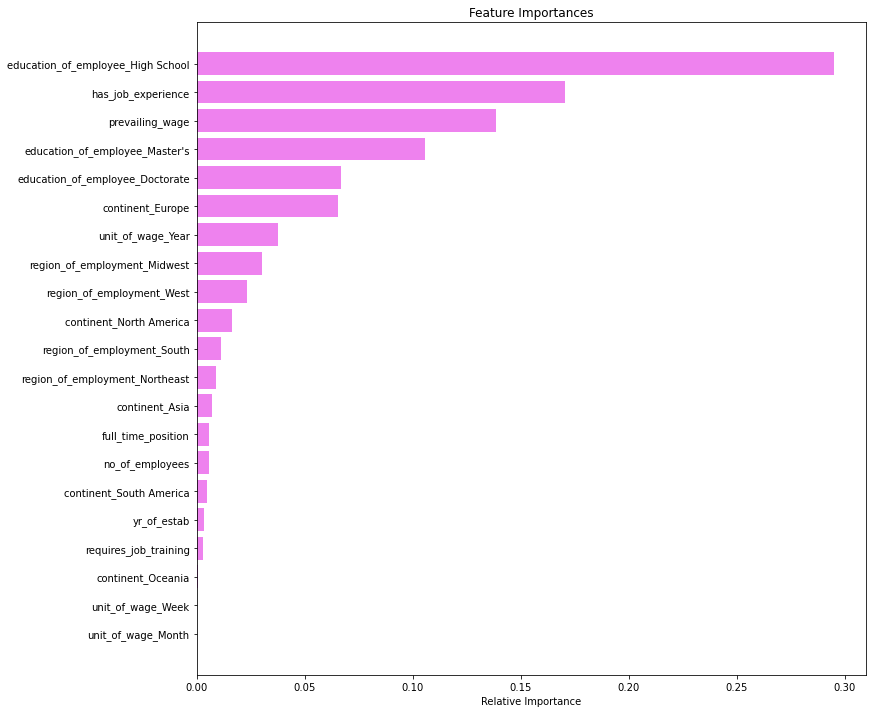

<IPython.core.display.Javascript object>

In [116]:
feature_names = X_train.columns
importances = gb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Actionable Insights and Recommendations

- The predictive model tcan estimate the visa status with almost a 75% certainty. Given the employees education, experience, country of origin, region relocating to, and wage, we can determine whether an employee will be approved for a visa or not.
- This prediction will allow companies to determine whether or not they should put their time in a candidate, thus saving time and money. Knowing the prediction in advance will also help them select the best possible candidate, as they will not try for someone that will be denied and waste precious time.
- This model can be used to input a candidates profile, and determine within a certain confidence level whether the cendidate will receive a certified status or not.
- The most important factor is whether or not someone has only a high school level education. This makes up 30% of the knowledge needed ot predict the visa status. If the candidate has job experience, that makes up 17%. The prevailing wage makes up 14%, and if the candidate has a master's degree that makes up about 11%. These factors total to about 72% of the knowledge needed to determine visa status.
- We can give a profile regarding approval rates for certain characteristics. Given the characteristics, the company can reduce the time needed to find certain candidates. These characteristics are as:
    - Applicants with a doctorate are approved almsot 90% of the time. Master's at about 80%. Bachelor's almost 60%. High School diplomas are at about 30%.
    - Approval ratings for continents. Europe is at about 80%, Africa is at about 70%, Asia is at about 68%, Oceania is at about 65%, North America is at about 63%, and Africe is at about 60%.
    - Those with work experience are approved 70% of the time.
- Targeting certain areas over others will increase productivity.
- Targeting certain education levels will decrease the time used to find an employee.
- Filter applicants based on work experience.
- Filter out hourly wage applicants can also increase chances for certified visa status.
- Filtering candidates based on prevailing wage will help increase visa status.